In [5]:
import numpy as np
import numpy.linalg as nla
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

# Householder transformation

In [182]:
def Householder(A):
    m,n = A.shape
    R = A
    Q = np.eye(m)

    for j in range(n):
        x = R[j:,j]
        e_1 = np.zeros(len(x))
        e_1[0] = 1
        v_k = np.sign(x[0])*nla.norm(x)*e_1+x
        v_k = v_k/nla.norm(v_k) # normalize the reflection vector

        # Form of Householder transformation is H = I - 2(vv^t)/(v^tv)
        # R[j:, :]H Will eliminate all subdiagonal elements
        # Hence R[j:, :]H = R[j:, :] - R[j:, :]*2(vv^t)/(v^tv)
        R[j:, :] = R[j:, :] - 2* np.outer(v_k, v_k).dot(R[j:, :])
        Q[:, j:] = Q[:, j:] - 2 * Q[:, j:].dot(np.outer(v_k, v_k))
    
    return(Q,R)
    

In [183]:
A = np.array([[0.34,0.4,0.3,0.9],[0.45,0.25,0.98,0.46],[0.923,0.34,3,-2],[0.34,-0.45,0.1,0.55]])
print(nla.cond(A))
Q,R=Householder(A)
print Q,R

37.7572925586
[[-0.29986176 -0.45548197  0.72189882  0.4260061 ]
 [-0.39687586 -0.16662497  0.24300203 -0.86929609]
 [-0.81403649 -0.07202495 -0.52451613  0.23883014]
 [-0.29986176  0.87154157  0.38038788  0.07617926]] [[ -1.13385581e+00  -3.60998282e-01  -2.95099251e+00   1.01071052e+00]
 [  2.21424777e-17  -6.40531217e-01  -4.28857747e-01   1.36816497e-01]
 [ -1.07170808e-16  -2.61264017e-17  -1.08079798e+00   2.01973547e+00]
 [ -5.85795884e-17   1.07904415e-16   0.00000000e+00  -4.52232385e-01]]


In [184]:
print(nla.cond(R))

37.7572925586


In [185]:
np.transpose(Q)

array([[-0.29986176, -0.39687586, -0.81403649, -0.29986176],
       [-0.45548197, -0.16662497, -0.07202495,  0.87154157],
       [ 0.72189882,  0.24300203, -0.52451613,  0.38038788],
       [ 0.4260061 , -0.86929609,  0.23883014,  0.07617926]])

In [186]:
nla.inv(Q)

array([[-0.29986176, -0.39687586, -0.81403649, -0.29986176],
       [-0.45548197, -0.16662497, -0.07202495,  0.87154157],
       [ 0.72189882,  0.24300203, -0.52451613,  0.38038788],
       [ 0.4260061 , -0.86929609,  0.23883014,  0.07617926]])

In [187]:
R

array([[ -1.13385581e+00,  -3.60998282e-01,  -2.95099251e+00,
          1.01071052e+00],
       [  2.21424777e-17,  -6.40531217e-01,  -4.28857747e-01,
          1.36816497e-01],
       [ -1.07170808e-16,  -2.61264017e-17,  -1.08079798e+00,
          2.01973547e+00],
       [ -5.85795884e-17,   1.07904415e-16,   0.00000000e+00,
         -4.52232385e-01]])

# Root finding problem

## Bisection method

In [18]:
def biSection(func, a,b,tol=0.00001):
    thresHold_vec = []
    midpoint = a+(b-a)/2.0
    
    while (b-a)/2.0 > tol:
        thresHold_vec.append((b-a)/2.0)
        if func(a)*func(midpoint) < 0:
            b = midpoint
        else :
            a = midpoint
        midpoint = a+(b-a)/2.0
    return midpoint,thresHold_vec

In [19]:
def f(x):
    y = x**2 - 4*np.sin(x)
    return(y)

In [20]:
sol, vec = biSection(f, 1,3)
print(sol)

1.93375396729


In [23]:
f(sol)

1.0811072055361137e-06

In [21]:
vec

[1.0,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05,
 3.0517578125e-05,
 1.52587890625e-05]

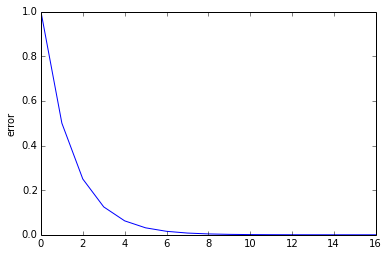

In [22]:
plt.plot(vec)
plt.ylabel('error')
axes = plt.gca()
plt.show()